# DCSI 100 Group Project

## By Alec Jessen, Avery Swoboda, Daniel Wick, Naya Bhatthal 


# Title: An Investigation into the Factors that help Set up a Top Tennis Player for Success

## Introduction:

Tennis is a racquet sport played between one another or teams of 2 opposing each other. Within the sport, a ranking system represents how good a player is based on their performance and form. For example, the ATP rankings system collects points for a tennis player from events over 52 weeks. (Within this ranking system, there is a grand slam component.) Four fall within the 52-week time frame and are considered the highest-graded tournaments in the ATP calendar. (In regards to prize money, it's found that the majority of prize money is attained by a very small number of the highest-ranked players.) (This system prevents new talented tennis players from having the ability to make a living from the sport while only a small group of individuals are making the most money.) We investigated to see how variables such as age and rank (measured by both current rank and best rank) correlate with prize money earned by each player, (as a measure of success in terms of being able to support their livelihood playing this sport). 
This led to the research question:

### Question: “How do variables such as age, and rank (both current rank and best rank) correlate with a tennis player’s success level, as measured by prize money earned?”

The dataset analyzed to answer the above question was “Player Stats for Top 500 Players” from ultimate tennis statistics.com. It is a detailed dataset that contains information about the name, age, country of origin, playing style (right-handed or left-handed), backhand (one-handed or two-handed), current and best ranking, current, best and peak elo rating, prize money earned for the top 500 tennis players worldwide, among other variables about their professional life about resources of information acquisition.

## Methods and Data Analysis
### Data Wrangling

To begin we loaded the necessary libraries to conduct our data analysis and installed a few packages pertaining to functions not as commonly used in the classroom. The janitor package contains key functions for cleaning and analyzing data, such as "clean_names." GGally provides various methods for visualizing  relationships, such as pairwise plots via the function "ggpairs."The ISLR (Introduction to Statistical Learning with Applications in R) also includes functions used in the textbook that we will employ. 

In [12]:
#install.packages("rlang")
#install.packages("readr")
#install.packages("dplyr")
#install.packages("ggplot2")
#install.packages("tidyverse")
#install.packages("rvest")
#install.packages("tidymodels")

install.packages("janitor")
install.packages("GGally")
install.packages("ISLR")

library(rlang)
library(dplyr)
library(tidyverse)
library(tidymodels)
library(janitor)
library(rsample)
library(ggplot2)
library(repr)
library(GGally)
library(ISLR)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



First, we downloaded the tennis dataset from the indicated website and saved it locally as "player_stats.csv." As the data set is separated by semicolons, we then used the "read_csv" function to read the file into a data frame named "tennis_data". The "clean_names" function was used to standardize the column names to only include lowercase letters and underscores rather than spaces. We then selected the subset of columns relevant to our investigation. The "na.omit" function was used to delete rows with missing values.

To create the new tidy dataset named "tennis_data_tidy", we transformed the "age," "current_rank," and "best_rank" columns from character (chr) to numeric (dbl) forms. We used additional expressions to extract the numeric values from the "prize_money" column in particular, as it contained extra characters describing the rank and special statuses of the players. We also used the "mutate" function to create additional variables, such as "current_rank_rev" and "best_rank_rev", so that higher values indicate a higher ranking during the interpretation of the variables. To do this, the original ranks were subtracted from 501, the total number of ranks in the dataset plus one so that the rank one player would be at 500 instead of 499. After doing a preliminary research (as seen later on in the methods section), we noted that prize money may contain a non-linear distribution of funds by rank with a large proportion of funds being given to the top-performing players, so we established a variable called "log_prize_money," which denotes the base-10 logarithm of "prize_money." We then used the "head" function to display a preview of our tidy dataset.

In [22]:
# Download the tennis data file from the web into a local .csv file, then tidy the data specific for our analysis

# Make sure this "#" below is removed before submission  !!!!!   (leave for testing for now)
#download.file("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS","player_stats.csv")
tennis_data <- read_csv("player_stats.csv", show_col_types = FALSE)

tennis_data_tidy <- tennis_data |> 
    select(-Wikipedia) |> 
    clean_names() |>
    select(x1, age, current_rank, best_rank, prize_money) |>
    na.omit()

tennis_data_tidy <- tennis_data_tidy |>
  mutate(
    age = as.numeric(sub(" .*", "", age)),
    current_rank = as.numeric(sub(" .*", "", current_rank)),
    best_rank = as.numeric(sub(" .*", "", best_rank)),
    prize_money = str_extract(prize_money, regex("^[^$]*[$]\\s*[0123456789,]+\\b")),
    prize_money = as.numeric(gsub("[^0-9]", "", prize_money)),
    current_rank_rev = 501 - current_rank,
    best_rank_rev = 501 - best_rank, 
    log_prize_money = log(prize_money)
  ) |>
    na.omit()

head(tennis_data_tidy)

New names:
• `` -> `...1`


x1 age current_rank best_rank prize_money current_rank_rev best_rank_rev
1 1  18  326          316         59040     175              185          
2 2  32  178           44       3261567     323              457          
3 3  21  236          130        374093     265              371          
4 4  27  183           17       6091971     318              484          
5 5  22   31           31       1517157     470              470          
6 6  28  307          213        278709     194              288          
  log_prize_money
1 10.98597       
2 14.99772       
3 12.83226       
4 15.62248       
5 14.23235       
6 12.53792

Next, we created an initial pairplot from the data, using age, reversed current rank, reversed best rank, and prize money as variables to compare.

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Computation failed in `stat_bin()`
Caused by error in `bin_breaks_width()`:
! The number of histogram bins must be less than 1,000,000.
ℹ Did you make `binwidth` too small?”


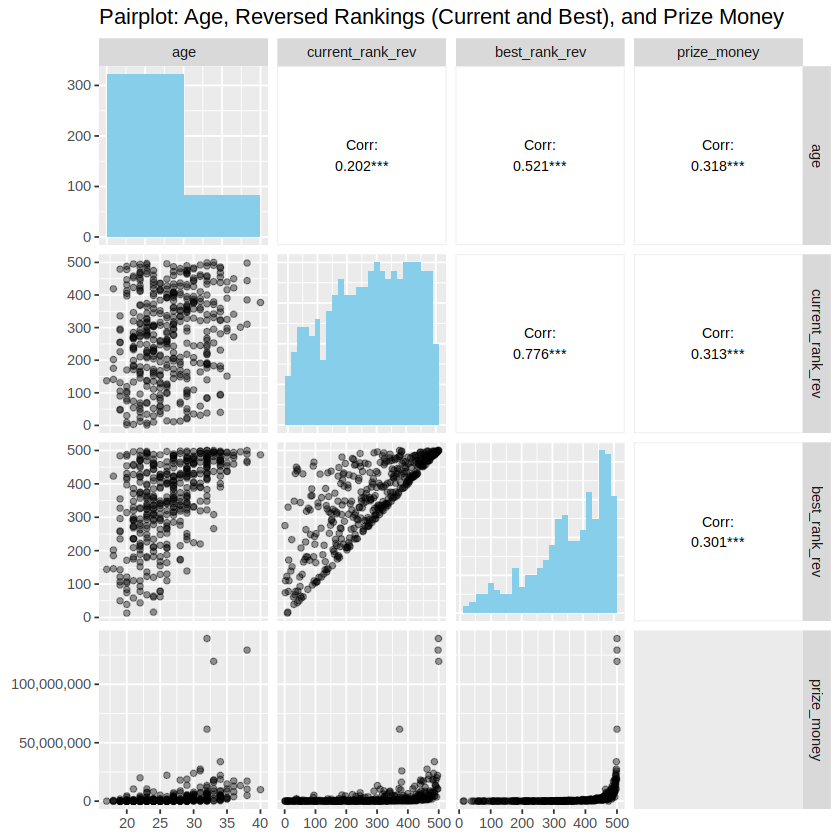

In [5]:
tennis_pairplot <- tennis_data_tidy |> 
    select(age, current_rank_rev, best_rank_rev, prize_money) |>
    ggpairs(lower = list(continuous = wrap('points', 
                                         alpha = 0.4, 
                                         color = "black")),
            diag = list(continuous = wrap('barDiag', binwidth = 20, fill = "skyblue")),
            upper = list(continuous = wrap('cor', size = 3, color = "black"))) +
            theme(text = element_text(size = 11)) +
  scale_y_continuous(labels = scales::comma) +
  ggtitle("Pairplot: Age, Reversed Rankings (Current and Best), and Prize Money")

tennis_pairplot

As we expected, a positive correlation was found between best and current rank and prize money, as indicated by the values being greater than zero and less than one (0.301 and .313, respectively). A positive correlation was also seen between age and prize money (.318), this may be due to increased age corresponding to increased experience and hence acquired success.  This data however appears to have some problems, with no visualization displayed for "prize_money vs. prize_money", which may be due to the large numerical values of prize money compared with age and ranking, and possible non-linear relationships established between them. We explored this further by visualizing each predictor variable (age, reversed current rank, and reversed best rank) versus prize money with individual scatter plots.


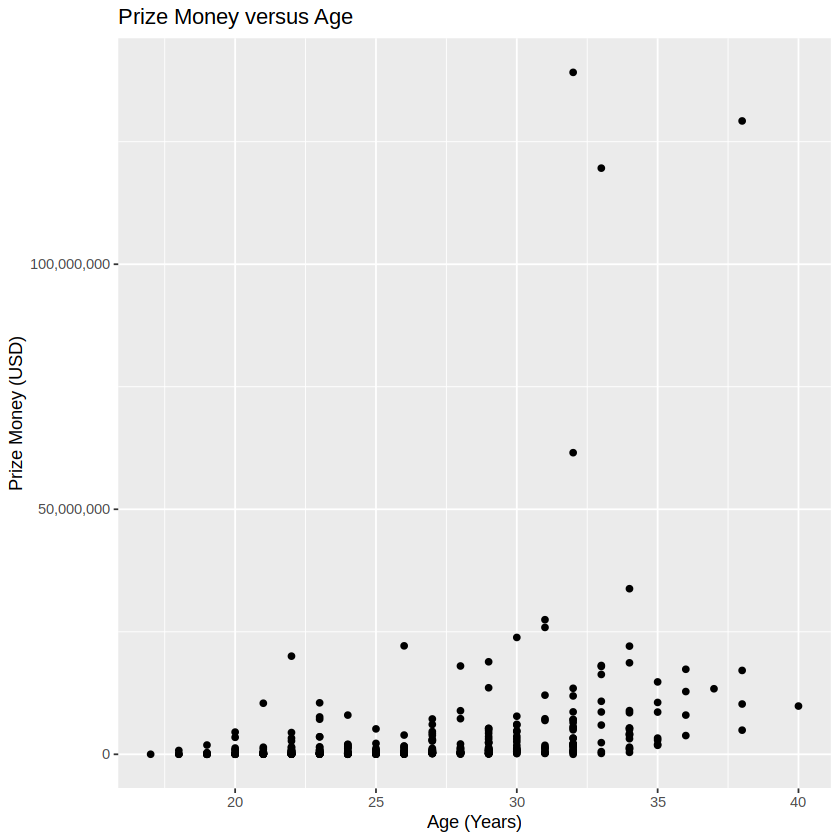

In [6]:
# Scatter plot to compare best rank versus prize money, copy later on for regression line addition 
# Make sure to note why these plots are not as useful as logged versions of them
# !!!!! Maybe make these plots next to eachother? Using facet_wrap or otherwise?

prize_age_plot <- ggplot(tennis_data_tidy, 
                    aes(x= age, y= prize_money)) +
    geom_point() +
    labs(x= "Age (Years)",
         y= "Prize Money (USD)") +
    scale_y_continuous(labels = scales::comma) +
    ggtitle("Prize Money versus Age")

prize_current_rank_plot <- ggplot(tennis_data_tidy, 
                             aes(x= current_rank_rev, y= prize_money)) +
    geom_point() +
    labs(x= "Reversed Current Ranking (higher value is better)",
         y= "Prize Money (USD)") +
    scale_y_continuous(labels = scales::comma) +
    ggtitle("Prize Money versus Reversed Current Rank")

prize_best_rank_plot <- ggplot(tennis_data_tidy, 
                          aes(x= best_rank_rev, y= prize_money)) +
    geom_point() +
    labs(x= "Reversed Best Ranking (higher value is better)",
         y= "Prize Money (USD)") +
    scale_y_continuous(labels = scales::comma) +
    ggtitle("Prize Money versus Reversed Best Rank")
    

prize_age_plot


The plot between age and prize money displayed the expected weak positive linear relationship. 

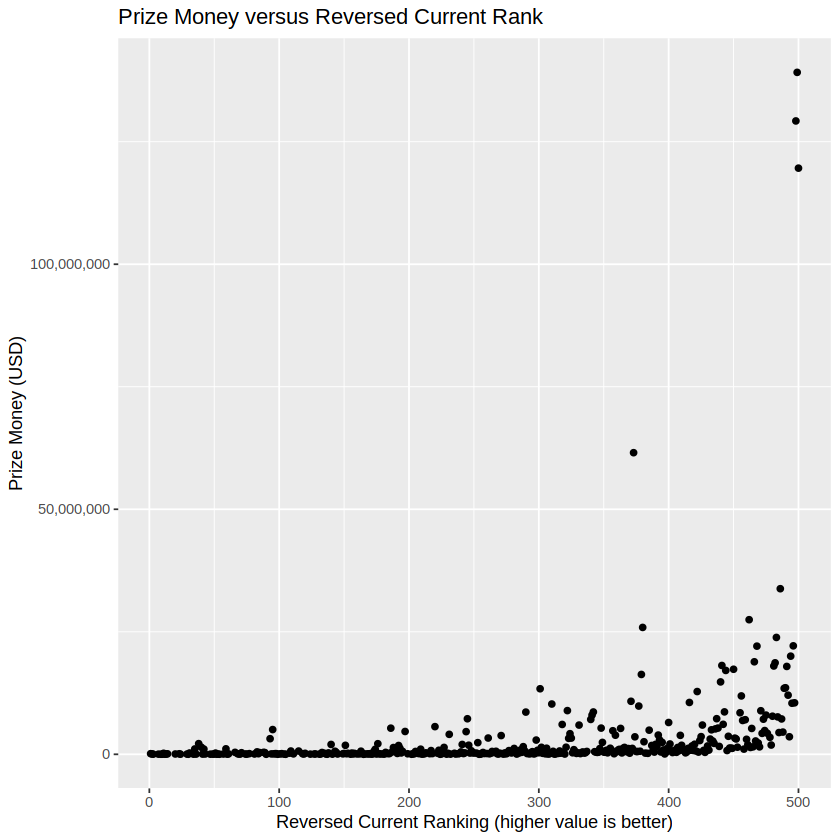

In [7]:
prize_current_rank_plot

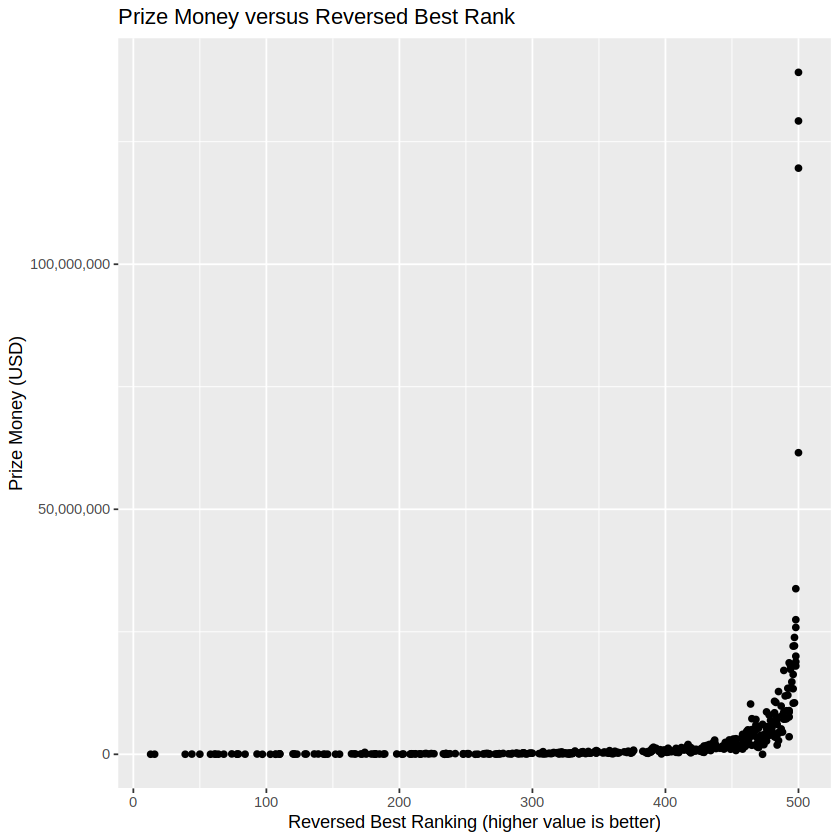

In [8]:
prize_best_rank_plot

The scatter plots between either of the reversed rank variables versus prize money do not appear linear, but instead, prize money seems to exponentially increase with higher ranking. Hence, we decided use the logarithm of prize money as the response variable in our following data analysis, and created another pairplot from our tidy dataset. 

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


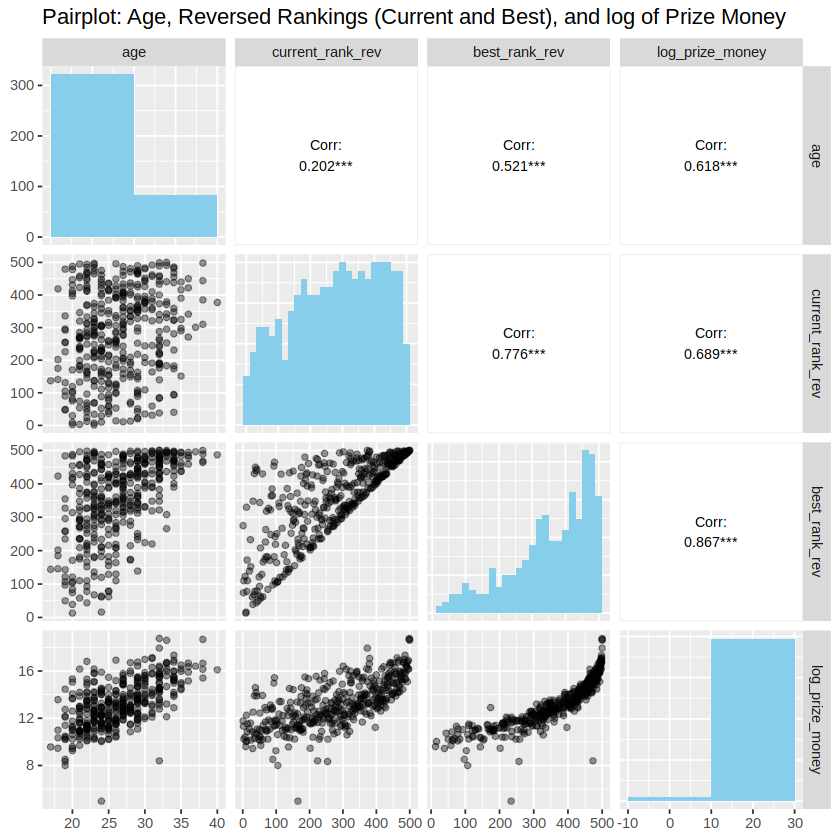

In [9]:
tennis_pairplot_2 <- tennis_data_tidy |> 
    select(age, current_rank_rev, best_rank_rev, log_prize_money) |>
    ggpairs(lower = list(continuous = wrap('points', 
                                         alpha = 0.4, 
                                         color = "black")),
            diag = list(continuous = wrap('barDiag', binwidth = 20, fill = "skyblue")),
            upper = list(continuous = wrap('cor', size = 3, color = "black"))) +
            theme(text = element_text(size = 11)) +
  scale_y_continuous(labels = scales::comma) +
  ggtitle("Pairplot: Age, Reversed Rankings (Current and Best), and log of Prize Money")

tennis_pairplot_2

A stronger positive correlation was found between best and current rank and natural log of prize money (.867 and .689, respectively). A stronger positive correlation was also seen between age and prize money (.618).  This pairplot also better displayed each relationship, and there seemed to be a general linear positive relationship between age, current rank, best rank and the natural log of prize money, by quickly observing the scatter plots.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


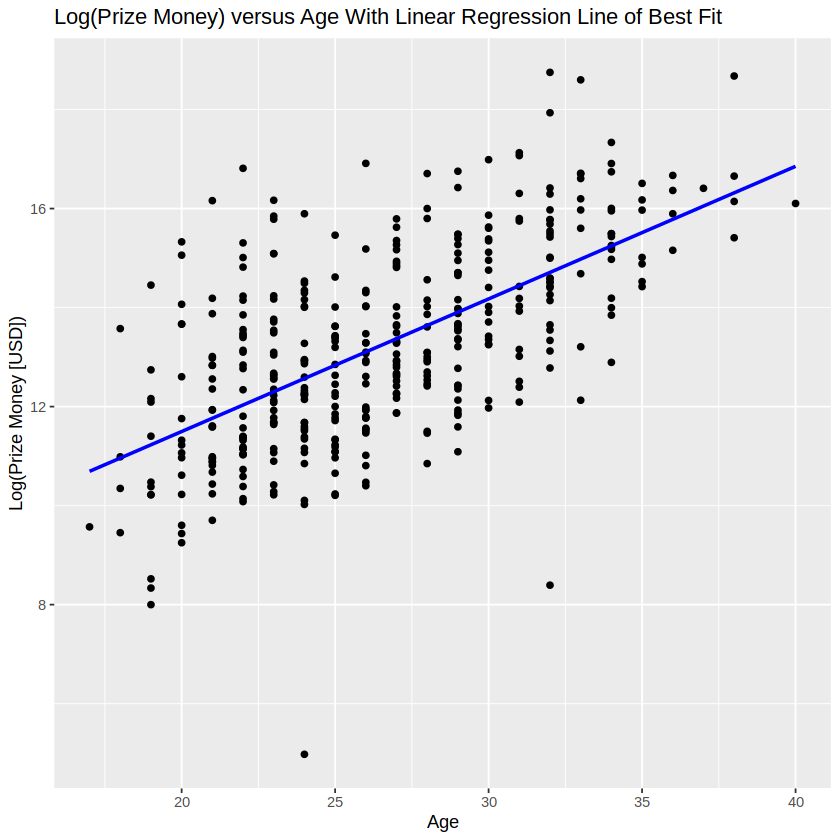

`geom_smooth()` using formula = 'y ~ x'


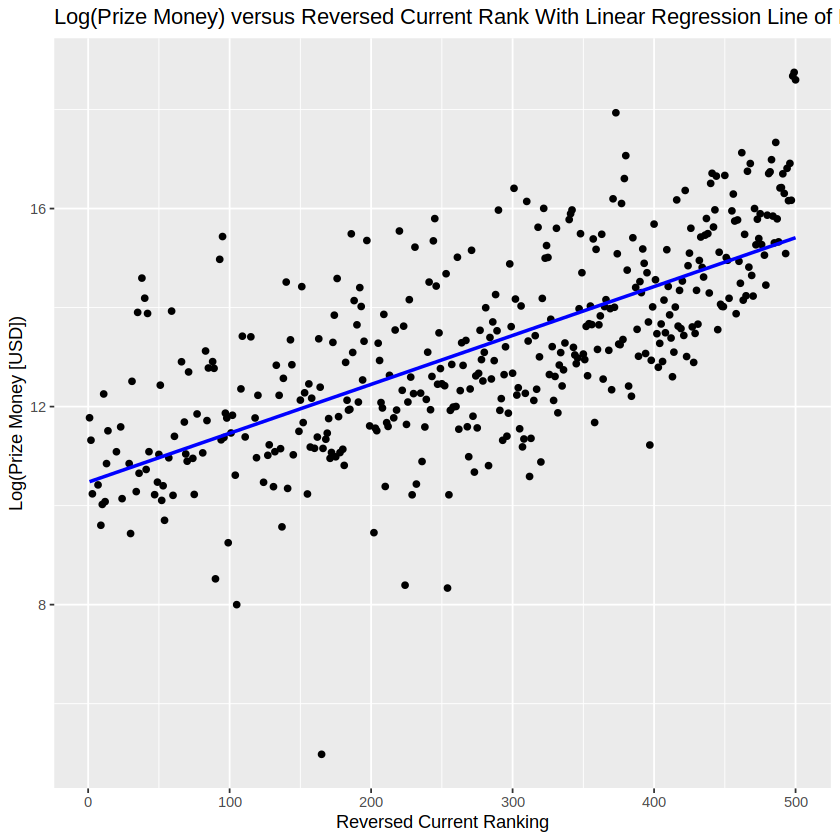

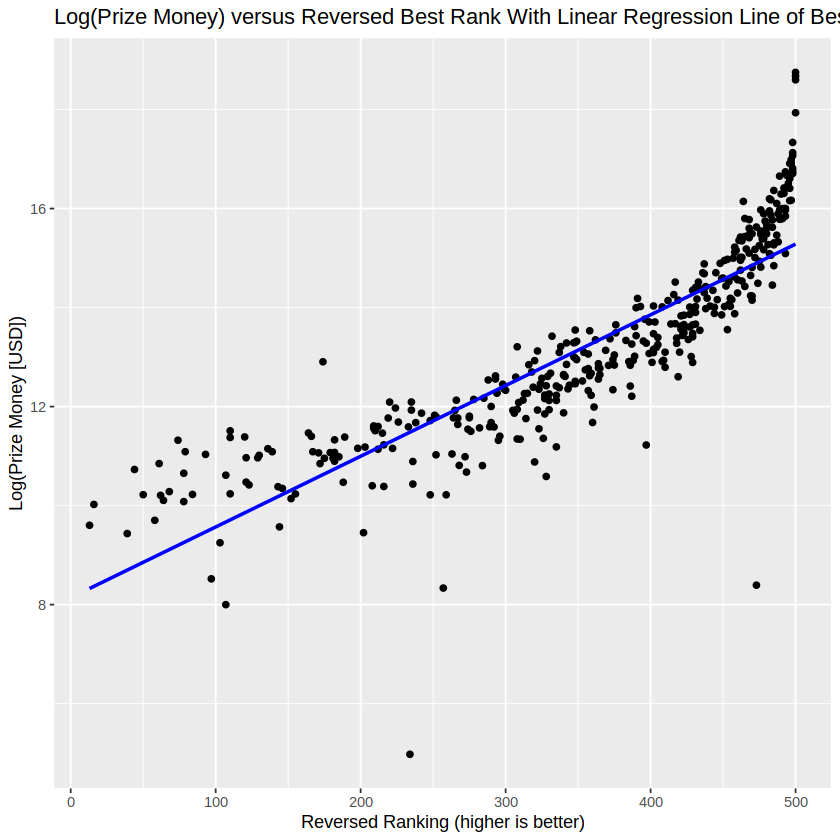

In [10]:
# Scatter plots with log scale for prize money and basic linear regression line, using the 
# Versus best rank, current rank, and age
# !!!!! Go through and standardize axis and titles for graphs 
# !!!!! Make these graphs pretty 


prize_age_line <- ggplot(tennis_data_tidy, 
                         aes(x = age, 
                             y = log_prize_money)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "blue") +
    labs(x = "Age",
         y = "Log(Prize Money [USD])") +
    ggtitle("Log(Prize Money) versus Age With Linear Regression Line of Best Fit")


prize_current_rank_log_line <- ggplot(tennis_data_tidy, 
                                      aes(x = current_rank_rev, 
                                          y = log_prize_money)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +  # Add linear regression line
  labs(x = "Reversed Current Ranking",
       y = "Log(Prize Money [USD])") +
  ggtitle("Log(Prize Money) versus Reversed Current Rank With Linear Regression Line of Best Fit")


prize_best_rank_log_line <- ggplot(tennis_data_tidy, 
                                   aes(x = best_rank_rev, 
                                       y = log_prize_money)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +  # Add linear regression line
  labs(x = "Reversed Ranking (higher is better)",
       y = "Log(Prize Money [USD])") +
  ggtitle("Log(Prize Money) versus Reversed Best Rank With Linear Regression Line of Best Fit")



prize_age_line
prize_current_rank_log_line
prize_best_rank_log_line

Each variable appears to show a much more linear relationship with the log of prize money, as corroborated by adding a line of best fit using the "geom_smooth" function. We decided to employ best rank, current rank, and age as our predictor variables for our subsequent analysis using linear regression, as they all showed clear correlation with log(Prize Money). 

### Linear Regression and Analysis
To begin our multivariable linear regression analysis, we divided the tidy dataset into training and testing sets. The "initial_split" function allotted 80%  of the data for training and 20% for testing  ("prop = 0.8"). Setting the option "strata = log_prize_money" ensured that the split was stratified based on our tentative assignment of the response variable as "prize_money" so that values of the variable were proportionally represented in both the training and testing sets.  As the dataset is quite large, we decided to use an 80-20 split, as it still allows a sufficient amount of data for testing, while using a large subset for training to deduce patterns and relationships in the model.

In [13]:
set.seed(123)

tennis_split <- initial_split(tennis_data_tidy, prop = 0.8, strata = log_prize_money)

tennis_split <- initial_split(tennis_data_tidy, prop = 0.8, strata= log_prize_money) 

training_data <- training(tennis_split)
testing_data <- testing(tennis_split)

We used the tidymodels framework to create a linear regression model. The recipe was configured to predict the base-10 log of prize money using the reversed rankings of current and best rank. The fitted model and details were printed to derive the resulting equation.

log_prize_money= 8.161616 + 0.000417(current_rank_rev) + 0.013898(best_rank_rev)
log(Prize Money) = 5.785622 + 0.126411 * Age + 0.002483 * Reversed Current Rank + 0.009516 * Reversed Best Rank

It predicts the response variable log(Prize Money) from age, reversed current rank and reversed best rank. 

In [15]:
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

# Create a recipe for the model
tennis_recipe <- recipe(log_prize_money ~ age + current_rank_rev + best_rank_rev, 
                        data = training_data)

tennis_fit <- workflow() |>
  add_recipe(tennis_recipe) |>
  add_model(lm_spec) |>
  fit(data = training_data)

# Print the fitted model
tennis_fit

# Print the linear regression specification
print(lm_spec)

# Print the recipe
print(tennis_recipe)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
     (Intercept)               age  current_rank_rev     best_rank_rev  
        5.785622          0.126411          0.002483          0.009516  


Linear Regression Model Specification (regression)

Computational engine: lm 

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3


To determine the accuracy of this prediction model, we computed the RMSE (root mean squared error) of the model as seen below. ### Then explain what the RMSE is and whether the model appears to be a good or bad prediction of the information provided!

In [19]:

lm_rmse <- tennis_fit |>
    predict(training_data) |>
    bind_cols(training_data) |>
    metrics(truth = log_prize_money, estimate = .pred) |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()
lm_rmse

[1] 0.9022876

In [23]:
#!!!!! More analysis and maybe a visualization?!?!?

tennis_preds <- tennis_fit |>
  predict(training_data) |>
  bind_cols(training_data)

#tennis_preds


### Results and Discussion:

Through this data analysis, we expect to find a correlation between various factors of players and their tennis performance measured via a number of metrics. These findings could help to understand which factors are correlated with better or worse performance in players, perhaps allowing for improvements in the choice of techniques to improve performance or being able to better estimate the performance of newer players. This analysis could lead to further questions about which variables could be changed to improve performance in new athletes, or which metrics of success are most useful for tennis athletes.

